In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats
from scipy.stats import linregress

In [2]:
# Import API key
from api_key import weather_api_key

In [3]:
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

In [4]:
# Output File (CSV)
output_data_file = "output_data/cities.csv"

In [5]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lat_range = (-180, 180)

# Generate Cities List

In [6]:
# Create a set of random lat and lng combinations
lat_lngs = []

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

In [7]:
# Identify nearest city for each lat, lng combination
cities = []

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to our cities list
    if city not in cities:
         cities.append(city)            
# cities

# Perform API Calls

In [8]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
# query_url

In [9]:
lat = []
lon = []
max_temp = []
humidity = []
cloudiness = []

wind_speed = []
date = []
country = []
city_name = []

not_located = []
except_set = 1

print('Beginning Data Rerieval')
print('-----------------------')

for index, city in enumerate(cities, start=1):
    try:
        
        response = requests.get(query_url + city).json()
        # Request will be pause for 2 seconds   
        time.sleep(2)
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        
        wind_speed.append(response["wind"]["speed"])
        date.append(response["dt"])
        country.append(response["sys"]["country"])
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        city_name.append(city)
        print(f'Processing Record {index} of Set {except_set} | {city}')
        
    except:
        
        not_located.append(city)
        print(f"city({city}) not found")
        except_set+= 1
print('-----------------------')
print('Data Retrieval Complete')
print('-----------------------')


Beginning Data Rerieval
-----------------------
Processing Record 1 of Set 1 | arawa
Processing Record 2 of Set 1 | tateyama
Processing Record 3 of Set 1 | tezu
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | busselton
city(samusu) not found
Processing Record 7 of Set 2 | ust-ordynskiy
Processing Record 8 of Set 2 | airai
Processing Record 9 of Set 2 | adrar
Processing Record 10 of Set 2 | vagamo
Processing Record 11 of Set 2 | mahebourg
Processing Record 12 of Set 2 | tahta
city(tsihombe) not found
Processing Record 14 of Set 3 | hithadhoo
Processing Record 15 of Set 3 | kichera
Processing Record 16 of Set 3 | kurdzhinovo
Processing Record 17 of Set 3 | cape town
Processing Record 18 of Set 3 | severodvinsk
Processing Record 19 of Set 3 | rutland
Processing Record 20 of Set 3 | arraial do cabo
Processing Record 21 of Set 3 | ushuaia
Processing Record 22 of Set 3 | carnarvon
Processing Record 23 of Set 3 | puerto quijarro
Processing Record 24 of Set 3 | bathsheba
P

Processing Record 198 of Set 16 | yar-sale
Processing Record 199 of Set 16 | kaeo
Processing Record 200 of Set 16 | elizabeth city
Processing Record 201 of Set 16 | upernavik
Processing Record 202 of Set 16 | mapimi
Processing Record 203 of Set 16 | ouahigouya
Processing Record 204 of Set 16 | nanortalik
Processing Record 205 of Set 16 | north bend
Processing Record 206 of Set 16 | goure
Processing Record 207 of Set 16 | chapais
city(amderma) not found
Processing Record 209 of Set 17 | karangasem
Processing Record 210 of Set 17 | salalah
Processing Record 211 of Set 17 | sainte-suzanne
Processing Record 212 of Set 17 | platanos
Processing Record 213 of Set 17 | richards bay
Processing Record 214 of Set 17 | pahrump
Processing Record 215 of Set 17 | tocopilla
Processing Record 216 of Set 17 | boa vista
Processing Record 217 of Set 17 | nikolskoye
Processing Record 218 of Set 17 | muros
Processing Record 219 of Set 17 | qusar
Processing Record 220 of Set 17 | hami
Processing Record 221 o

Processing Record 393 of Set 30 | port augusta
Processing Record 394 of Set 30 | petauke
city(mahadday weyne) not found
Processing Record 396 of Set 31 | shambu
Processing Record 397 of Set 31 | dunedin
Processing Record 398 of Set 31 | plettenberg bay
Processing Record 399 of Set 31 | healdsburg
Processing Record 400 of Set 31 | bethel
Processing Record 401 of Set 31 | garden city
city(louisbourg) not found
Processing Record 403 of Set 32 | palana
Processing Record 404 of Set 32 | pacific grove
Processing Record 405 of Set 32 | meulaboh
Processing Record 406 of Set 32 | roznava
Processing Record 407 of Set 32 | aykino
Processing Record 408 of Set 32 | fort nelson
Processing Record 409 of Set 32 | mahibadhoo
Processing Record 410 of Set 32 | payo
Processing Record 411 of Set 32 | byron bay
Processing Record 412 of Set 32 | burnie
Processing Record 413 of Set 32 | ishim
Processing Record 414 of Set 32 | broken hill
Processing Record 415 of Set 32 | camacha
Processing Record 416 of Set 3

Processing Record 590 of Set 51 | osakarovka
Processing Record 591 of Set 51 | iaciara
Processing Record 592 of Set 51 | florence
Processing Record 593 of Set 51 | mandan
Processing Record 594 of Set 51 | novopokrovka
Processing Record 595 of Set 51 | harer
Processing Record 596 of Set 51 | noyabrsk
Processing Record 597 of Set 51 | saint-augustin
Processing Record 598 of Set 51 | filadelfia
Processing Record 599 of Set 51 | ayame
city(tasbuget) not found
Processing Record 601 of Set 52 | zyryanka
Processing Record 602 of Set 52 | teguise
Processing Record 603 of Set 52 | muisne
Processing Record 604 of Set 52 | kirakira
Processing Record 605 of Set 52 | tomatlan
Processing Record 606 of Set 52 | umm lajj
Processing Record 607 of Set 52 | namatanai
Processing Record 608 of Set 52 | verkhoyansk
Processing Record 609 of Set 52 | madera
city(umm ruwabah) not found
Processing Record 611 of Set 53 | turayf
city(manzil tamim) not found
Processing Record 613 of Set 54 | vostok
Processing Reco

In [108]:
# Calculate number of cities found
found = len(cities)
not_found = len(not_located)
total_found = found - not_found
print(f'Cities were found {total_found}')  


Cities were found 580


# Create Dataframe to store requests from those lists

In [109]:
#format the column of dates of the df
dates = []
for d in date:
    date_test = d
    date_conversion = time.gmtime(date_test)
    date_format = time.strftime('%m/%d/%Y',date_conversion)
    dates.append(date_format)
# dates

In [110]:
# dates

In [111]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "city": city_name,
    "cloudiness":cloudiness,
    "Country":country,
    "date":dates,
    "humid":humidity,
    "lat": lat,
    "lng":lon,
    "max_temp": max_temp,
    "wind_speed":wind_speed,
}

weather_data = pd.DataFrame(weather_dict)
weather_df = weather_data.rename(columns={
    "city":"City",
    "cloudiness":"Cloudiness",
    "date":"Date",
    "humid":"Humidity (%)",
    "lng":"Longitude",
    "max_temp":"Max Temperature",
    "wind_speed":"Wind Speed",
    "lat":"Longitude"
 })
weather_data.to_csv("output_data/cities.csv", index = False)
count_weather_data = weather_df.count()


In [112]:
weather_data.head()

,city,cloudiness,Country,date,humid,lat,lng,max_temp,wind_speed
0,arawa,100,PG,03/15/2020,80,-6.21,155.54,82.71,7.23
1,tateyama,40,JP,03/15/2020,43,34.98,139.87,51.80,19.46
2,tezu,85,IN,03/15/2020,70,27.92,96.17,66.51,4.90
3,albany,40,US,03/15/2020,43,42.60,-73.97,37.99,10.29
4,busselton,8,AU,03/15/2020,64,-33.65,115.33,69.01,8.19


# Create scatter plots 

Latitude vs. Max Temperature

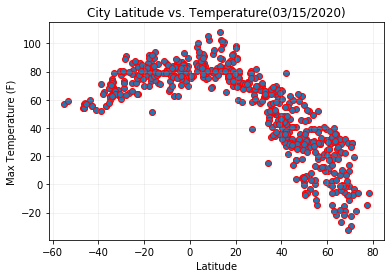

<Figure size 432x288 with 0 Axes>

In [113]:
# Build a scatter plot for each data type
title_date = dates[0]
plt.scatter(weather_data["lat"], weather_data["max_temp"], marker = 'o',
            edgecolor='red', alpha = 1
           )

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Temperature({title_date})")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(alpha=0.2)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

#print graph to output
plt.savefig('output_data/latitude_MaxTemp.png')

Latitude vs. Humidity

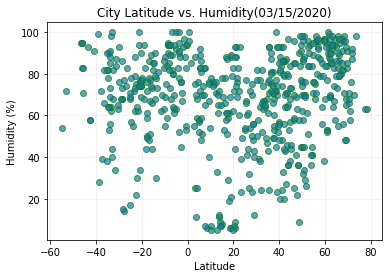

<Figure size 432x288 with 0 Axes>

In [14]:
# Build a scatter plot for each data type
title_date = dates[0]
plt.scatter(weather_data["lat"], weather_data["humid"], 
            edgecolor='green', alpha=.7)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity({title_date})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(alpha=0.2)

# Save the figure
plt.savefig("HumidityInWorldCities.png")

# Show plot
plt.show()

#print graph to output
plt.savefig('output_data/latitude_Humidity.png')

Latitude vs. Cloudiness

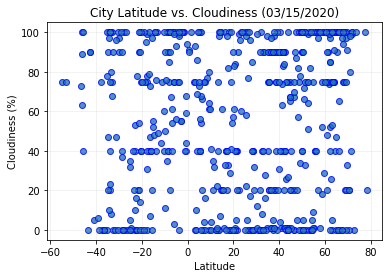

<Figure size 432x288 with 0 Axes>

In [15]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["cloudiness"],
           edgecolor='blue', alpha=.8)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({title_date})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(alpha=0.2)

# Save the figure
plt.savefig("CloudinessInWorldCities.png")

# Show plot
plt.show()

#print graph to output
plt.savefig('output_data/latitude_Cloudiness.png')

Latitude vs. Wind Speed

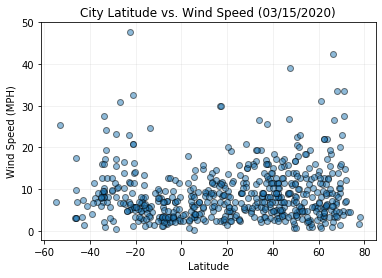

<Figure size 432x288 with 0 Axes>

In [73]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["wind_speed"],
            edgecolor='black', alpha=.5)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({title_date})")
plt.ylabel("Wind Speed (MPH)")
plt.xlabel("Latitude")
plt.grid(alpha=0.2)

# Save the figure
plt.savefig("WinSpeedInWorldCities.png")

# Show plot
plt.show()

#print graph to output
plt.savefig('output_data/latitude_WindSpeed.png')

# Northern and Southern Hemisphere

In [17]:
# weather_data.head(3)

In [97]:
# Select data for northern and southern
# Use df.loc[df['column_name']=='condition'] to create criteria
# and put into new df
northern_df = weather_data.loc[weather_data["lat"]>=0]
southern_df = weather_data.loc[weather_data["lat"]<0]
# northern_df
# southern_df

# Linear Regression

Northern Hemisphere 
(Max Temperature vs Latitude)

In [98]:
# Use df.loc[:,'cloumns'] to select specific column
north_temp = northern_df.loc[:,'max_temp']
north_lat = northern_df.loc[:,'lat']
# north_temp
# north_lat

# Calculate the linear regression using scipy.stats library
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat,north_temp)
print(f'The correlation factor is {round(rvalue,2)}')

The correlation factor is -0.89


y = -1.4 x + 101.22


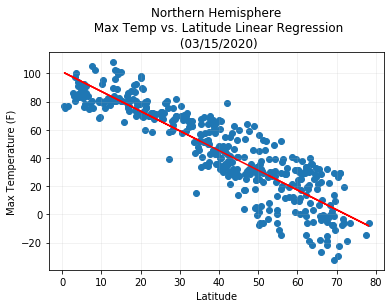

In [99]:
plt.scatter(north_lat,north_temp)
plt.title(f'Northern Hemisphere\n Max Temp vs. Latitude Linear Regression\n ({dates[0]})')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(alpha=0.2)

regress = north_lat * slope + intercept
# regress

# Calculate y equation
line_equation = print(f"y = {round(slope, 2)} x + {round(intercept,2)}")

plt.plot(north_lat, regress, 'r-')
plt.savefig("output_data/northLat_maxTemp.png")

Sothern Hemisphere (Max Temperature vs Latitude)

In [100]:
# Use df.loc[:,'cloumns'] to select specific column
south_temp = southern_df.loc[:,'max_temp']
south_lat = southern_df.loc[:,'lat']
# south_temp
# south_lat

# Calculate the linear regression using scipy.stats library
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat,south_temp)
print(f'The correlation factor is {round(rvalue,2)}')

The correlation factor is 0.64


y = 0.5 x + 85.21


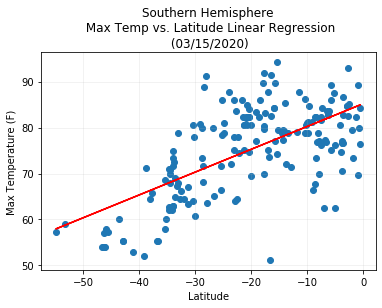

In [101]:
plt.scatter(south_lat,south_temp)
plt.title(f'Southern Hemisphere\n Max Temp vs. Latitude Linear Regression\n ({dates[0]})')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(alpha=0.2)

regress = south_lat * slope + intercept
# regress

# Calculate y equation
line_equation = print(f"y = {round(slope, 2)} x + {round(intercept,2)}")

plt.plot(south_lat, regress, 'r-')
plt.savefig("output_data/southLat_maxTemp.png")

Northern Hemisphere - Humidity (%) vs. Latitude

In [102]:
north_humid = northern_df.loc[:,'humid']
north_lat = northern_df.loc[:,'lat']

# Calculate the linear regression using scipy.stats library
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat,north_humid)
print(f'The correlation factor is {round(rvalue,2)}')


The correlation factor is 0.34


y = 0.41 x + 50.65


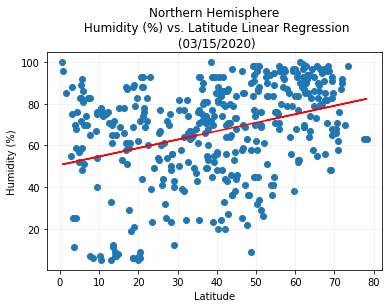

In [103]:
plt.scatter(north_lat,north_humid)
plt.title(f'Northern Hemisphere\n Humidity (%) vs. Latitude Linear Regression\n ({dates[0]})')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(alpha=0.2)

regress = north_lat * slope + intercept
# regress

# Calculate y equation
line_equation = print(f"y = {round(slope, 2)} x + {round(intercept,2)}")

plt.plot(north_lat, regress, 'r-')
plt.savefig("output_data/northLat_humidity.png")

Southern Hemisphere - Humidity (%) vs. Latitude

In [104]:
south_temp = southern_df.loc[:,'humid']
south_lat = southern_df.loc[:,'lat']

# Calculate the linear regression using scipy.stats library
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat,south_temp)
print(f'The correlation factor is {round(rvalue,2)}')

The correlation factor is 0.16


y = 0.22 x + 77.67


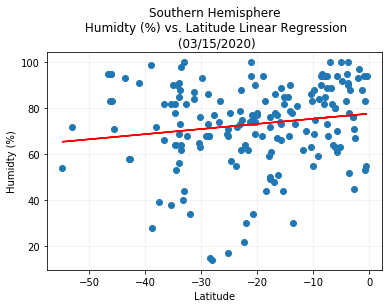

In [105]:
plt.scatter(south_lat,south_temp)
plt.title(f'Southern Hemisphere\n Humidty (%) vs. Latitude Linear Regression\n ({dates[0]})')
plt.xlabel('Latitude')
plt.ylabel('Humidty (%)')
plt.grid(alpha=0.2)

regress = south_lat * slope + intercept
# regress

# Calculate y equation
line_equation = print(f"y = {round(slope, 2)} x + {round(intercept,2)}")

plt.plot(south_lat, regress, 'r-')
plt.savefig("output_data/southLat_humidity.png")